# Exercise 4: Image classification

## 1. Install dependencies, if needed

Run the commands below to install the dependencies

In [ ]:
import sys
!{sys.executable} -m pip install pillow matplotlib scikit-image scikit-learn

## 2. Extract regions and features

- Download the images from [here](https://drive.google.com/file/d/1hoRUUC2zSIHdPz1_bAb3CIWJuXKi-u1h/view?usp=sharing). The zip file contains the following subfolders:
    - images
    - gt: Ground truth (GT) labels for each pixel of the image, labeled with the following classes
        - 0. Impervious
        - 1. Building
        - 2. Low vegetation
        - 3. Tree
- Run the code block of functions that extract features (is the same code you implemented in the past exercise)
- Extract and save regions for each image using SLIC (use the parameter n_segments=1000)
- Extract and save features for the regions of each image

In [2]:
# The following functions are the same you implemented the past week
# You do not need to edit the functions of this code block (just run it)
def convert_to_shape_pixels_by_bands(data):
    num_dimensions = len(data.shape)
    assert(num_dimensions == 2 or num_dimensions == 3)
    if num_dimensions == 3:
        num_bands = data.shape[2]
        return data.reshape((-1, num_bands))
    else:
        return data

def compute_average_feature(data):
    # If needed convert data to the shape (num_pixels x num_bands)
    data_2d = convert_to_shape_pixels_by_bands(data)
    # Get the number of bands
    num_bands = data_2d.shape[1]
    avg_features = np.zeros(num_bands)
    for b in range(num_bands):
        # Compute the average value of each band (use the function np.mean)
        avg_features[b] = np.mean(data_2d[:, b])
    return avg_features

def compute_standard_deviation_feature(data):
    # If needed convert data to the shape (num_pixels x num_bands)
    data_2d = convert_to_shape_pixels_by_bands(data)
    # Compute the standard deviation feature (using the numpy function np.std)
    #       as in the function compute_average_feature iterate over the bands
    #       and compute one value for each band
    num_bands = data_2d.shape[1]
    avg_features = np.zeros(num_bands)
    for b in range(num_bands):
        avg_features[b] = np.std(data_2d[:, b])
    return avg_features

def compute_histogram_feature(data, num_bins=10):
    # If needed convert data to the shape (num_pixels x num_bands)
    data_2d = convert_to_shape_pixels_by_bands(data)
    num_bands = data_2d.shape[1]
    hist_features = np.zeros((num_bands, num_bins)).astype(np.float32)
    for b in range(num_bands):
        # Compute the histogram for each band 
        #       use the function np.histogram(array, bins=num_bins)
        hist, boundaries = np.histogram(data_2d[:, b], bins=num_bins)
        hist_features[b, :] = hist
    # Return a 1D array containing all the values
    return hist_features.flatten()

def compute_image_features_from_regions(image, segmentation_map):
    num_regions = len(np.unique(segmentation_map))
    all_features = []
    for id_region in range(num_regions):
        # Obtain pixel values of each regions, with shape (num_pixels x num_bands)
        pixel_values = image[segmentation_map==id_region]
        # Compute the average, standard deviation and histogram features
        #       and concatenated them unsing the function (np.concatenate)
        avg = compute_average_feature(pixel_values)
        features = compute_standard_deviation_feature(pixel_values)
        hist_features = compute_histogram_feature(pixel_values)
        features = np.concatenate([avg, features, hist_features])
        # Add concatenated features to the variable all_features
        all_features.append(features)
    # convert list to numpy array of shape: (num_regions x num_bands)
    return np.array(all_features).astype(np.float32)

Let's extract regions and their features (average, standard deviation and histogram of each band)

In [3]:
import numpy as np
from skimage.io import imsave, imread
from skimage.segmentation import slic

# TODO: Fill the path of the dataset (e.g., "images_week4/")
input_dir = "images_week4/"

total_num_images = 6
for image_number in range(1, total_num_images + 1):
    # TODO: Read image
    image_path = input_dir + "images/image_" + str(image_number) +".tif"
    image = imread(image_path)
    # TODO: Segment image using SLIC (use the parameter n_segments=1000)
    segmented_image = slic(image, n_segments=1000, start_label=0)
    # Save SLIC regions
    regions_path = input_dir + "regions/regions_" + str(image_number) + ".tif"
    imsave(regions_path, segmented_image.astype(np.uint32))
    print("Regions saved in " + regions_path)
    # TODO: Compute features
    region_features = compute_image_features_from_regions(image, segmented_image)
    # Save features
    region_features_path = input_dir + "features/features_" + str(image_number) + ".npy"
    np.save(region_features_path, region_features)
    print("Features saved in " + region_features_path)

/var/folders/mz/m5zdnl0n7_s8dyb8ttkdvtc40000gn/T/ipykernel_37291/2377130849.py:17: UserWarning: images_week4/regions/regions_1.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in images_week4/regions/regions_1.tif
Features saved in images_week4/features/features_1.npy


/var/folders/mz/m5zdnl0n7_s8dyb8ttkdvtc40000gn/T/ipykernel_37291/2377130849.py:17: UserWarning: images_week4/regions/regions_2.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in images_week4/regions/regions_2.tif
Features saved in images_week4/features/features_2.npy


/var/folders/mz/m5zdnl0n7_s8dyb8ttkdvtc40000gn/T/ipykernel_37291/2377130849.py:17: UserWarning: images_week4/regions/regions_3.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in images_week4/regions/regions_3.tif
Features saved in images_week4/features/features_3.npy


/var/folders/mz/m5zdnl0n7_s8dyb8ttkdvtc40000gn/T/ipykernel_37291/2377130849.py:17: UserWarning: images_week4/regions/regions_4.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in images_week4/regions/regions_4.tif
Features saved in images_week4/features/features_4.npy


/var/folders/mz/m5zdnl0n7_s8dyb8ttkdvtc40000gn/T/ipykernel_37291/2377130849.py:17: UserWarning: images_week4/regions/regions_5.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in images_week4/regions/regions_5.tif
Features saved in images_week4/features/features_5.npy


/var/folders/mz/m5zdnl0n7_s8dyb8ttkdvtc40000gn/T/ipykernel_37291/2377130849.py:17: UserWarning: images_week4/regions/regions_6.tif is a low contrast image
  imsave(regions_path, segmented_image.astype(np.uint32))


Regions saved in images_week4/regions/regions_6.tif
Features saved in images_week4/features/features_6.npy


## 3. Create training dataset
- Define wich images will conform the training set, and which ones the test set
- Read the images from the training set and compute the ideal label for each region (the label that has the largest intersection with each region)
- Create an array of targets (groud truth), per region, that joins the targets of all the training images
- Create an array of features that joins the features of all the training images

In [4]:
# TODO: define which images will be in the training set, and which ones in the test set
# Example : train_image_numbers = [1 ,2, 3] 
#           test_image_numbers = [4 ,5, 6]
train_image_numbers = [1 ,2, 3] 
test_image_numbers = [4 ,5, 6]

In [4]:
def get_label_per_region(segmented_image, label_map):
    """
    Returns a 1D numpy array that contains the label for each region, shape: (num_regions)
            For each region, we obtain the label that has the largest intersection with it
    """
    num_regions = len(np.unique(segmented_image))
    num_labels = len(np.unique(label_map))
    region_labels = []
    for region_id in range(num_regions):
        mask_region = segmented_image == region_id
        
        intersection_per_label = []
        for label_id in range(num_labels):
            mask_label = label_map == label_id
            # Compute intersection of each region with each label
            intersection = np.sum(mask_region * mask_label)
            intersection_per_label.append(intersection)
        
        intersection_per_label = np.array(intersection_per_label)
        # Obtain the index of the label with largest intersection
        selected_label = np.argmax(intersection_per_label)
        region_labels.append(selected_label)
    
    return np.array(region_labels).astype(np.uint32)

In [5]:
import numpy as np
from skimage.io import imsave, imread

# Create arrays of training targets and features 
all_train_region_features = []
all_train_region_labels = []

for image_number in train_image_numbers:
    # TODO: read segmented image
    segmented_image_path = input_dir + "regions/regions_" + str(image_number) + ".tif"
    segmented_image = imread(segmented_image_path)
    # TODO: read ground truth image
    gt_path = input_dir + "gt/gt_" + str(image_number) + ".tif"
    gt_image = imread(gt_path)
    # TODO: Get labels per region using the function "get_label_per_region" defined above
    region_labels = get_label_per_region(segmented_image, gt_image)
    # Add current region labels to the variable all_train_region_labels
    all_train_region_labels.append(region_labels)
    # TODO: read features using the function: np.load(file_path.npy)
    region_features_path = input_dir + "features/features_" + str(image_number) + ".npy"
    region_features = np.load(region_features_path)
    # Add current region features to the variable all_train_region_features
    all_train_region_features.append(region_features)

# Tranforming the list all_train_region_labels in an array of shape: (num_all_regions)
train_labels = np.concatenate(all_train_region_labels)
print("train_labels shape " + str(train_labels.shape))
# Tranforming the list all_train_region_features in an array of shape: (num_all_regions, num_features)
train_features = np.concatenate(all_train_region_features)
print("train_features shape " + str(train_features.shape))

train_labels shape (2023,)
train_features shape (2023, 36)


## 4. Normalize features

Normalize features by substracting the mean and dividing by the standard deviation

In [6]:
mean_per_feature = np.mean(train_features, axis=0)
std_per_feature = np.std(train_features, axis=0)
# TODO: normalize features by substracting the mean and dividing by the standard deviation
norm_train_features = (train_features - mean_per_feature) / std_per_feature

## 5. Train Random Forest classifier

Train model using the ***sklearn*** library

In [7]:
from sklearn.ensemble import RandomForestClassifier

# TODO: create random forest classifier with the parameter random_state=10
classifier = RandomForestClassifier(random_state=10)
# TODO: fit the model with the normalized features
classifier.fit(norm_train_features, train_labels)

RandomForestClassifier(random_state=10)

## 6. Predict classification map for test images

For each image in the test set
- Load features
- Predict labels by region
- Predict labels for each pixel
- Save the predictions on disk

In [8]:
for image_number in test_image_numbers:
    # TODO: read segmented image
    segmented_image_path = input_dir + "regions/regions_" + str(image_number) + ".tif"
    segmented_image = imread(segmented_image_path)
    # TODO: read features using the function: np.load(file_path.npy)
    region_features_path = input_dir + "features/features_" + str(image_number) + ".npy"
    region_features = np.load(region_features_path)
    # TODO: normalize features by substracting the mean and dividing by the standard deviation (of the train set) 
    norm_region_features = (region_features - mean_per_feature) / std_per_feature
    # TODO: predict label of regions 
    label_predictions = classifier.predict(norm_region_features)
    # Compute label predictions per pixel
    predicion_map = np.zeros(segmented_image.shape).astype(np.uint8)
    num_regions = len(np.unique(segmented_image))
    for region_id in range(num_regions):
        # TODO: set the label predicted for a region to all the pixels of that region
        predicion_map[segmented_image==region_id] = label_predictions[region_id]
    # TODO: Save prediction map image
    prediction_map_path = input_dir + "prediction_map_" + str(image_number) + ".tif"
    imsave(prediction_map_path, predicion_map)

/var/folders/mz/m5zdnl0n7_s8dyb8ttkdvtc40000gn/T/ipykernel_17683/365980649.py:20: UserWarning: images_week4/prediction_map_4.tif is a low contrast image
  imsave(prediction_map_path, predicion_map)
/var/folders/mz/m5zdnl0n7_s8dyb8ttkdvtc40000gn/T/ipykernel_17683/365980649.py:20: UserWarning: images_week4/prediction_map_5.tif is a low contrast image
  imsave(prediction_map_path, predicion_map)
/var/folders/mz/m5zdnl0n7_s8dyb8ttkdvtc40000gn/T/ipykernel_17683/365980649.py:20: UserWarning: images_week4/prediction_map_6.tif is a low contrast image
  imsave(prediction_map_path, predicion_map)


## 7. Visualize predictions

Visualize one of the classification predictions saved one disk

In [9]:
import matplotlib.pyplot as plt

def display_label_image(label_map):
    colors = np.array([[255, 255, 255], # Impervious: white
                       [0, 0, 255],     # Building: Blue
                       [0, 255, 255],   # Low vegetation: cyan
                       [0, 255, 0]])    # Tree: green
    colors = colors.astype(np.uint8)
    color_map = np.zeros((label_map.shape[0], label_map.shape[1], 3)).astype(np.uint8)
    for label_id in range(colors.shape[0]):
        color_map[label_map == label_id] = colors[label_id, :]
    plt.figure(figsize = (11,11)) 
    plt.imshow(color_map)

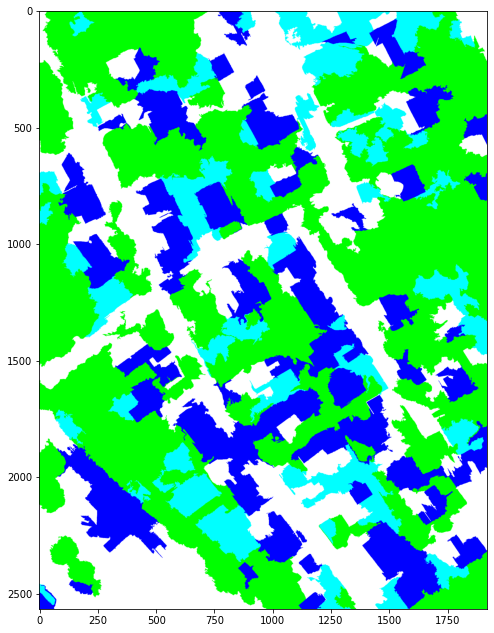

In [10]:
# TODO: display one of the prediction map images save on disk (using the function display_label_image, defined above)
example_prediction_path = "images_week4/prediction_map_4.tif" 
example_prediction = imread(example_prediction_path)
display_label_image(example_prediction)

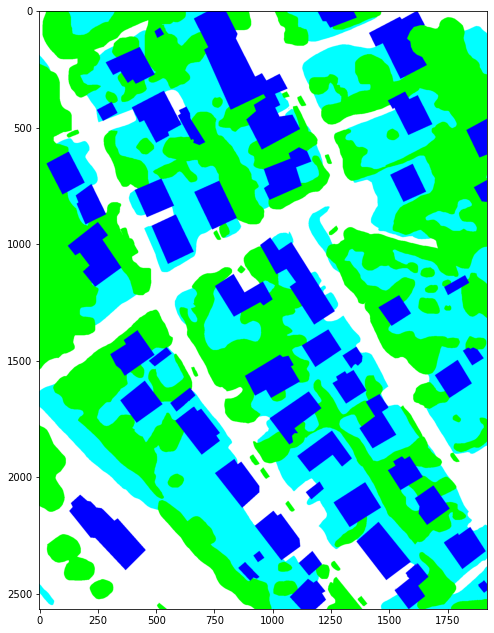

In [11]:
# TODO: Display the ground truth corresponding to the image you visualized above
example_gt_path = "images_week4/gt/gt_4.tif" 
example_gt = imread(example_gt_path)
display_label_image(example_gt)

## 8. Answer the remaining questions of the PDF instructions file